In [38]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [39]:
df_IND=df[(df['job_country']=='India')].dropna(subset=['salary_year_avg'])

In [40]:
job_titles= df_IND['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [41]:
df_IND_top6= df_IND[df_IND['job_title_short'].isin(job_titles)]

In [42]:
job_order=df_IND_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

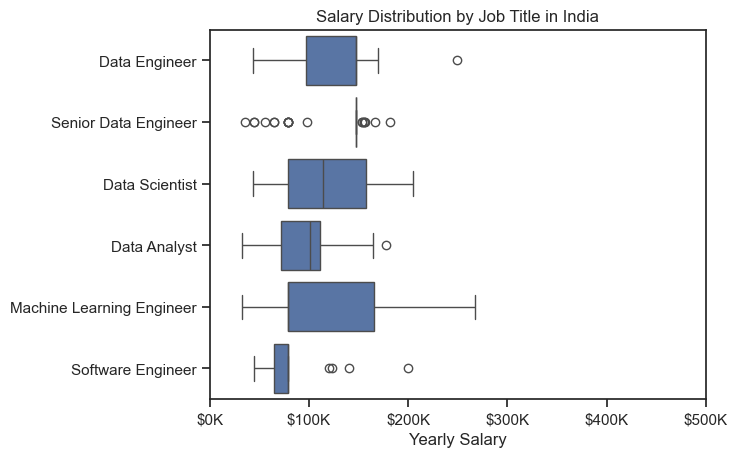

In [43]:
sns.boxplot(data=df_IND_top6, x='salary_year_avg', y='job_title_short',order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution by Job Title in India')
plt.xlabel('Yearly Salary')
plt.ylabel('')
plt.xlim(0, 500000)
ticks_x= plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [44]:
df_DA_IND=df[(df['job_country']=='India')& (df['job_title_short']== 'Data Analyst')].copy()

df_DA_IND = df_DA_IND.dropna(subset=['salary_year_avg'])

In [45]:
df_DA_IND = df_DA_IND.explode('job_skills')

df_DA_IND[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [46]:
# finding the top paying skills

df_DA_top_pay=df_DA_IND.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

In [47]:
df_DA_skills = df_DA_IND.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


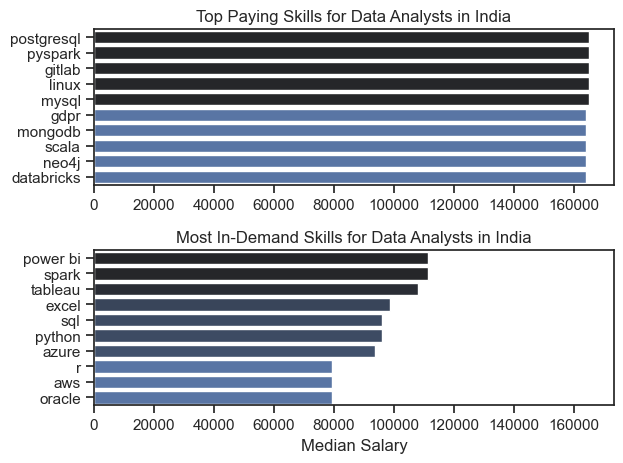

In [63]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')
# top 10 highest paying skills for Data Analysts in India
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index,hue='median', ax=ax[0], palette='dark:b_r')
ax[0].set_title('Top Paying Skills for Data Analysts in India')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend_.remove()


# top 10 most in-demand skills for Data Analysts in India
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='dark:b_r')
ax[1].set_title('Most In-Demand Skills for Data Analysts in India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary')
ax[1].legend_.remove()
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()

